### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Week 1 assignment: Data cleaning and Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## 1. Load and explore the data

In [15]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

# Set figure size.
sns.set(rc={"figure.figsize": (15, 12)})

# Set the plot style as white.
sns.set_style("white")

# Set a base output data directory
# Note to examiner: please change this to avoid file not found exceptions
#   when running this notebook.
BASE_DATA_DIR = "/Users/ameliaoberholzer/Documents/AA assignment/New data"

Start with exploring the data set 

In [16]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv("turtle_reviews.csv")


# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [17]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

Luckily there are no null values in the data set.

In [18]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [19]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

Now I clean the data set before the analysis 

In [20]:
# Drop unnecessary columns.
reviews_new = reviews.drop(columns=["language", "platform"])

# View column names.
list(reviews_new.columns)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [21]:
# Rename the column headers.
reviews_cleaned = reviews_new.rename(
    columns={
        "remuneration (k£)": "renumeration",
        "spending_score (1-100)": "spending_score",
    }
)

# View column names.
list(reviews_cleaned.columns)

['gender',
 'age',
 'renumeration',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

I have hashed out this code so the examiners don't have to download my new CSV file to run the code. 

In [22]:
# Create a CSV file as output.
#try:
    #reviews_new_name.to_csv(BASE_DATA_DIR + "/Week 1/reviews_cleaned_week1.csv")
#except IOError:
    #print("Unable to save figure due to IOError")

In [23]:
# Import new CSV file with Pandas.
#reviews_cleaned = pd.read_csv("reviews_cleaned_week1.csv")

# View DataFrame.
#reviews_cleaned.head()

We see here there are no null values to remove 

## 5. Linear regression

I'm going to investigate how loyalty points are accumulated by carrying out regression testing. With loyalty points as a dependent variable I will see to what extent other factors are repsonsible for the variation in loyalty points. 

It would be good to get an overview of the correltion of variables before starting this investigation

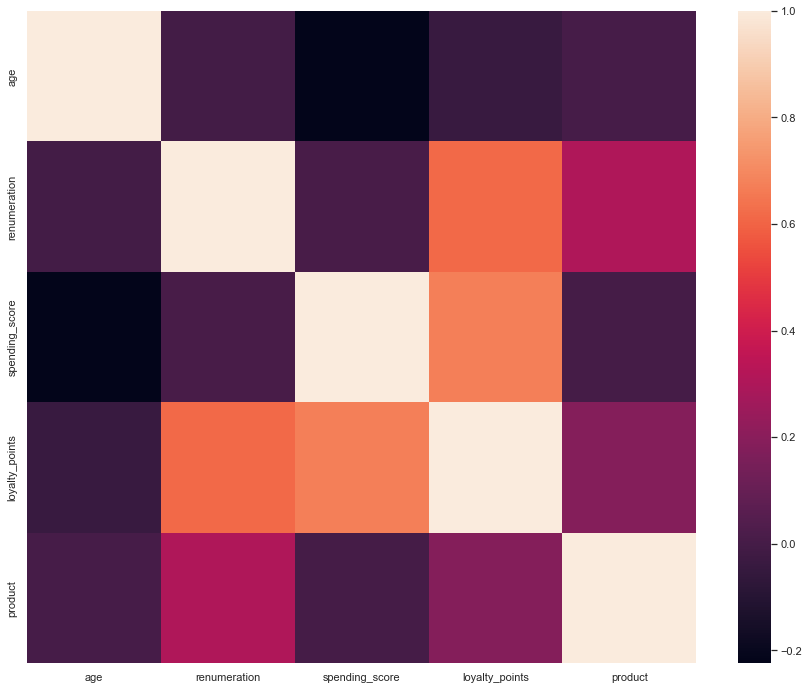

In [24]:
reviews_cleaned.corr()
sns.heatmap(reviews_cleaned.corr());

Loyalty points are more correlated with renumeration and spending score. I will now investigate to what extent loyalty points are correlated with renumeration and spending score using regression.

### 5a) spending vs loyalty

In [25]:
# Dependent variable.
y1 = reviews_cleaned["loyalty_points"]

# Independent variable.
x1 = reviews_cleaned["spending_score"]

# OLS model and summary.
f = "y1 ~ x1"
test = ols(f, data=reviews_cleaned).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        10:55:00   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x1            33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interestingly the R value shows how 45.2% of the variation of loyaty points can be explained by consumers spending scores. There is still over half of variation in loyalty points that has not been expalined yet. However, I have found a large explantion for variation in loyalty points. 

As long as p valyes is less than 0.05 model is significant. We see P value is (2.92e-263). This is less than 0.05 therefore the model is significant. 

In [26]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x1           33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x1            0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


The coeffeicnet as 33 this means that if spending score increases by 1 unit the number of loyalty points increases on average by 33.

The intercept -75.0527 tells us the expected number of loyalty points with a spending score of 0. This is quite meaningless here. 

In [27]:
# Predict loyalty points with spending score

predict_loyalty_spending_score = (-75.0527) + 33.0617 * (50)
predict_loyalty_spending_score

1578.0323

Here we see that the prediction of loyalty points for a certain spending score.

In [28]:
# Set the X coefficient and the constant to generate the regression table.
y1_pred = (-75.0527) + 33.0617 * reviews_cleaned["spending_score"]

# View the output.
y1_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

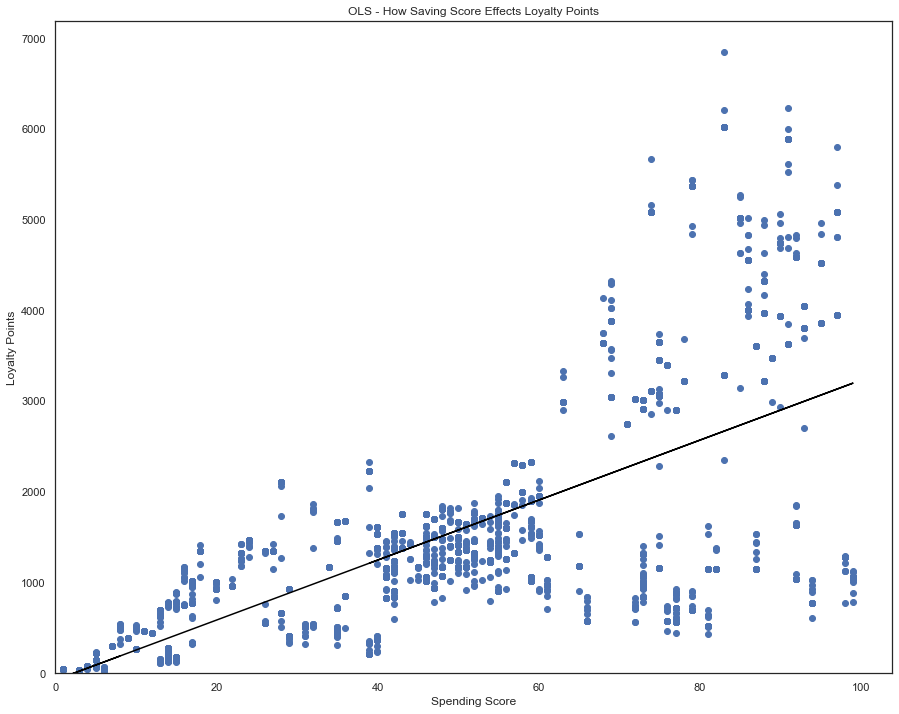

In [29]:
# Plot the graph with a regression line.
plt.scatter(x1, y1)

# Plot the regression line (in black).
plt.plot(x1, y1_pred, color="black")

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set the title
plt.title("OLS - How Saving Score Effects Loyalty Points")

# Set labels
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

# View the plot.
plt.show()

There is a regression line which goes through the actual data points. The fitted regression line seems to capture the relationship between the points well. 

We see here a regression in which a higher spending score leads to a higher number of loyalty points.

### 5b) renumeration vs loyalty

In [30]:
# Independent variable.
x2 = reviews_cleaned["renumeration"]

# Dependent variable.
y2 = reviews_cleaned["loyalty_points"]

# OLS model and summary.
f = "y2 ~ x2"
test = ols(f, data=reviews_cleaned).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        10:55:00   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R score is 0.380 meaning that the variation of loyaty points can be explained 38% by consuemrs renumeration. 

The coeffeicnet is 34.187 this means that if renumeration increases by 1 unit the number of loyalty points increases on average by 34.187.

The intercept -65.6865 tells us the expected number of loyalty points with a spending score of 0. This is quite meaningless here.

The P value is below 0.005 showing there is statistical significance. We see P value is (2.43-209). 

In [31]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x2           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x2            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [32]:
# Predict loyalty points with spending score
predict_loyalty_spending_score_r = (-65.686513) + 34.187825 * (50)
predict_loyalty_spending_score_r

1643.7047369999998

Here we see that with a renumeration of 50 the expected number of loyalty points is 1643.70.

In [33]:
# Set the the X coefficient and the constant to generate the regression table.
y2_pred = (-65.6865) + 34.1878 * reviews_cleaned["renumeration"]

# View the output.
y2_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: renumeration, Length: 2000, dtype: float64

Here are the different predicted loyatly scores for a certain level of renumeration. 

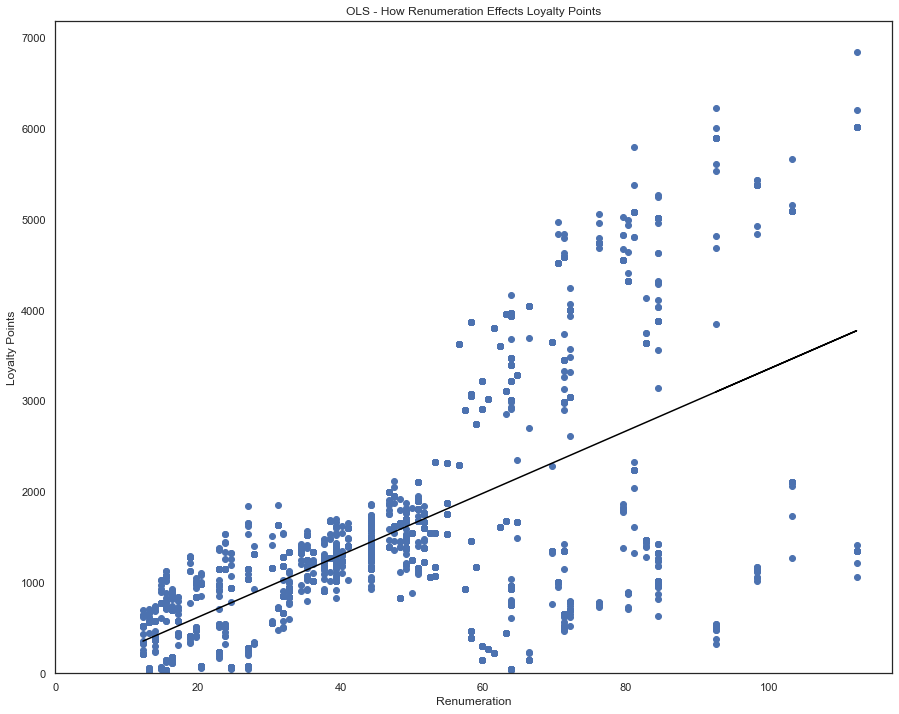

In [34]:
# Plot the graph with a regression line.
plt.scatter(x2, y2)

# Plot the regression line (in black).
plt.plot(x2, y2_pred, color="black")

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set the title
plt.title("OLS - How Renumeration Effects Loyalty Points")

# Set labels
plt.xlabel("Renumeration")
plt.ylabel("Loyalty Points")

# View the plot.
plt.show()

The regression here shows shows a positive relationsip between the points where an increase in renumeration leads to more loyalty points. 

The hgihest a customers runumeration the most loyalty points they will collect according to this relationship. However this does not help lower income customers to improve their loyalty to Turtle Games.

See this article about how to increase loyalty amongst lower income customers. For example some companies offer skills based training to help lower income customers increase employment opporunities. This helps to improve low income customers trust and loalty. 

https://www.centerforfinancialinclusion.org/building-customer-loyalty-at-the-bottom-of-the-pyramid

### 5c) age vs loyalty

In [35]:
# Independent variable.
y3 = reviews_cleaned["loyalty_points"]

# Dependent variable.
x3 = reviews_cleaned["age"]

# OLS model and summary.
f = "y3 ~ x3"
test = ols(f, data=reviews_cleaned).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        10:55:00   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see that variance in loyalty points can hardly be explained by age as the R value is only 0.002. 

Now the P value is above 0.05 which demonstrates statistical insignificance.

We also see that if age increases by 1 unit loyalty points would go down by -4.0128.

In [36]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x3             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x3            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [37]:
# Set the X coefficient and the constant to generate the regression table.
y3_pred = (1736.5177) + -4.0128 * reviews_cleaned["age"]

# View the output.
y3_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

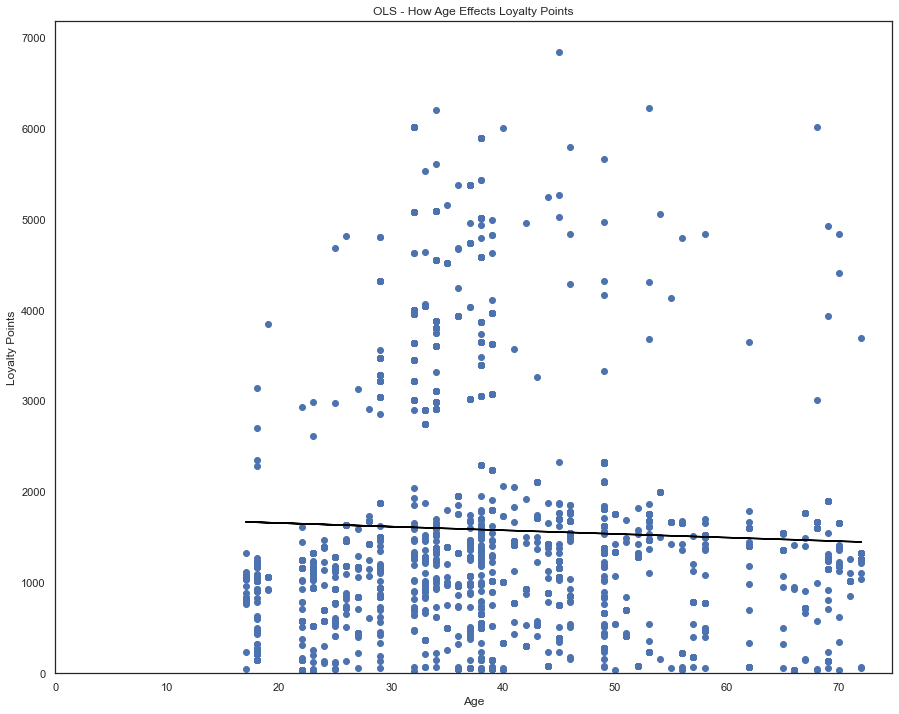

In [38]:
# Plot the graph with a regression line.
plt.scatter(x3, y3)

# Plot the regression line (in black).
plt.plot(x3, y3_pred, color="black")

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set the title
plt.title("OLS - How Age Effects Loyalty Points")

# Set labels
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

# View the plot.
plt.show()

Here there is a slight negative correlation where the younger the consumer the more loyalty points. However, as shown above this result is statistically insignificant.

### 6. Looking at multiple linear regression

With multiple linear regression I can compare all the potentially important factors in one model. This can lead to a more accurate understanding of how independent variables effect the variation in loyalty points. 

In [39]:
# Define the dependent variable.
y = reviews_cleaned["loyalty_points"]

# Define the independent variable.
# x is a set, use capital
X = reviews_cleaned[["spending_score", "renumeration"]]

In [40]:
# Fit the regression model.
# Picking this multiple linear regression model
mlr = linear_model.LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [41]:
# Call the predictions for X (array).
# Correspond to predicated loyalty points for fitted regrrion model depending
# On renumeration and spending score
mlr.predict(X)

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [42]:
# Print the R-squared value.
# Coefficient of determination
print("R-squared: ", mlr.score(X, y))

# Print the intercept.
print("Intercept: ", mlr.intercept_)

# Print the coefficients.
print("Coefficients:")

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))

R-squared:  0.826913470198926
Intercept:  -1700.3050970144361
Coefficients:


[('spending_score', 32.892694687821), ('renumeration', 33.97949882180281)]

R^2 is quite high. 82% of change in loyalty points can be explain by renumeration and spending score.

Slightly different results in this test. If the spending score increases by 32.9 loyalty points will increase by 1 whereas if renumeration increases by 34 loyalty will increase by 1. 

In [43]:
# Create a variable 'New_Rooms' and define it as 5.7.
spending_score = 99

# Create 'New_Distance' and define it as 15.2.
renumeration = 50

# Print the predicted value.
print("Predicted Value: \n", mlr.predict([[spending_score, renumeration]]))

Predicted Value: 
 [3255.04661817]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Here we see predicted value of loyalty points given two independent variables at certain values.

In [44]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.20, random_state=5
)

In [45]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test))

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     3665.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:55:00   Log-Likelihood:                -12292.
No. Observations:                1600   AIC:                         2.459e+04
Df Residuals:                    1597   BIC:                         2.461e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3810     40.400    -42.

R^2 is quite similar at 82% with a test data set to determine the accuracy of the model. 

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# Specify the model.
mlr = LinearRegression()

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)

LinearRegression()

In [48]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 1218.46660121   618.29301891  2312.04851244 ...  1452.7136095
 -1006.77936277  1203.19986663]


In [49]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 1.43311406e+03  3.38498142e+03  1.68174774e+03  1.59972741e+03
  1.05209014e+03  1.17026310e+03  3.41036952e+03  1.05209014e+03
  3.25925979e+03  2.23910009e+03 -2.03602914e+02  4.81806858e+02
  1.25121581e+02  1.20319987e+03  1.26907340e+03  1.41158500e+03
  1.19739315e+02  1.56679064e+03  3.16711810e+03  2.23910009e+03
  1.66560094e+03  2.08389444e+03  1.45271361e+03 -6.55239460e+02
  4.41052339e+03  2.99705200e+03  3.41317910e+03  1.56550430e+03
 -7.15730728e+02  1.57819835e+03  1.44645128e+03  4.20816370e+03
  1.32804143e+03  3.89839558e+03  1.23677981e+03  1.99022952e+03
 -1.11461224e+02  6.96217428e+02  2.16117568e+03  8.16556791e+02
  1.73749992e+03  9.49827093e+02  1.03313377e+03  1.56679064e+03
 -8.46834623e+02  1.50027394e+03  1.21332123e+03  1.67162638e+03
 -1.06188836e+03  1.61651738e+03  1.53063802e+03 -1.07803516e+03
  3.01793790e+03  1.60703919e+03 -2.52956378e+00  1.59908424e+03
  1.41287134e+03  1.21846660e+03  1.40877542e+03  3.93735779e+03


In [50]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test) * 100)

84.27307474340162


Test score which shows how much renumeration and spending score accounts for loyalty points is higher interestingly. This confirms the accurary of how renumeration and spending score account for a large amount of the variation of loyalty points. 

## Checking for multicollinearity with Python

In [51]:
# Add a constant.
x_temp = sm.add_constant(X_train)

# Create an empty DataFrame.
vif = pd.DataFrame()

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [
    variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])
]


# Create the feature columns.
vif["features"] = x_temp.columns

# Print the values to two decimal points.
print(vif.round(2))

   VIF Factor        features
0        9.45           const
1        1.00  spending_score
2        1.00    renumeration


What happens if predictors are highly correlated? 

How much variance is there? 

The variance inflation factor (VIF) measures multicollinearity by identifying the correlation between independent variables and the strength of correlation. 

- If the VIF value is one, then there is no correlation between an independent variable and any others. 
- A value between one and five suggests that correlation is moderate but not strong enough to need to fix. 
- If the VIF is greater than five, then multicollinearity is high and estimates will have large standard errors and unreliable p-values.

I assumed there might be some correlation between spending and income. 

No as VIF is one there is no correlation between spending and income. I find this somewhat hard to believe. 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.


I am now going to use k means clustering to gain more insights into the reviews data set. k mean clustering will help me to identify groups of customers that shop at turtle games.

## 1. Load and explore the data

In [52]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings

warnings.filterwarnings("ignore")

In [53]:
# Drop unnecessary columns.
renumeration_ss = reviews_cleaned.drop(
    columns=[
        "gender",
        "age",
        "loyalty_points",
        "education",
        "product",
        "review",
        "summary",
    ]
)

# View DataFrame.
renumeration_ss.head()

,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [54]:
# Explore the data.
renumeration_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   renumeration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [55]:
# Descriptive statistics.
renumeration_ss.describe()

,renumeration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

[Text(0.5, 1.0, 'Scatter Plot Showing the distribution of Spedending Score and Renumeration')]

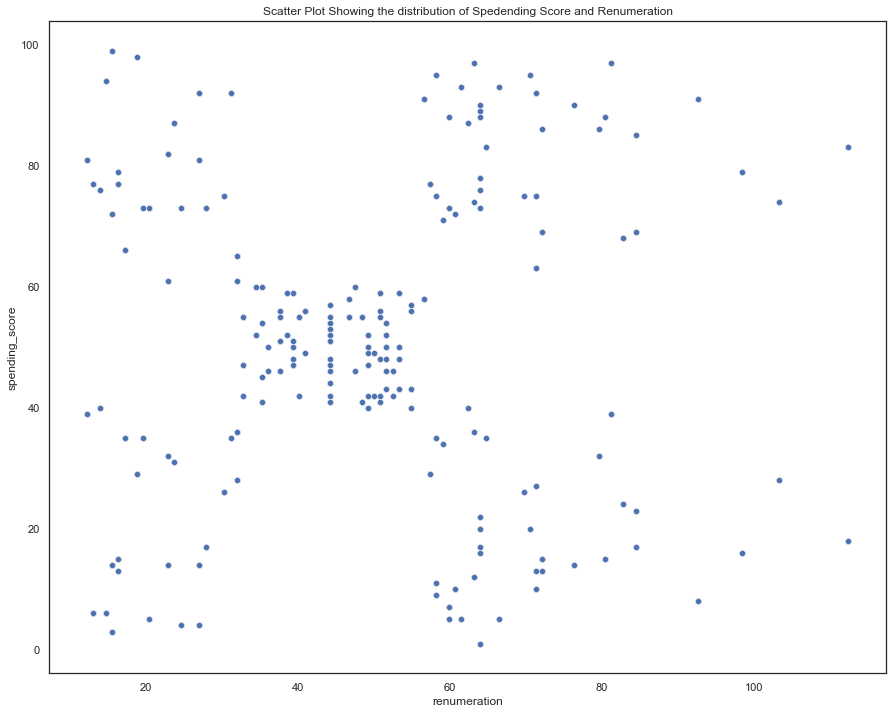

In [56]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.

# Create a scatterplot with Seaborn.
sns.scatterplot(x="renumeration", y="spending_score", data=renumeration_ss,).set(
    title=("Scatter Plot Showing the distribution of Spedending Score and Renumeration")
)

We can see how data points are distribution across spending and renumeration

Text(0.5, 1.1, 'Pair Plot - Histrograms and Scatter Plots for Renumeration and Spending Score')

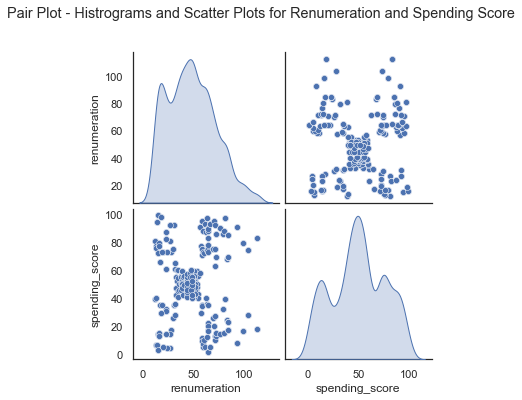

In [57]:
# Create a pairplot with Seaborn
x = renumeration_ss[["renumeration", "spending_score"]]

g = sns.pairplot(renumeration_ss, vars=x, diag_kind="kde")
g.fig.suptitle(
    "Pair Plot - Histrograms and Scatter Plots for Renumeration and Spending Score",
    y=1.1,
)

This graph gives us a deeper understanding of the distribution of data

## 3. Elbow and silhoutte methods

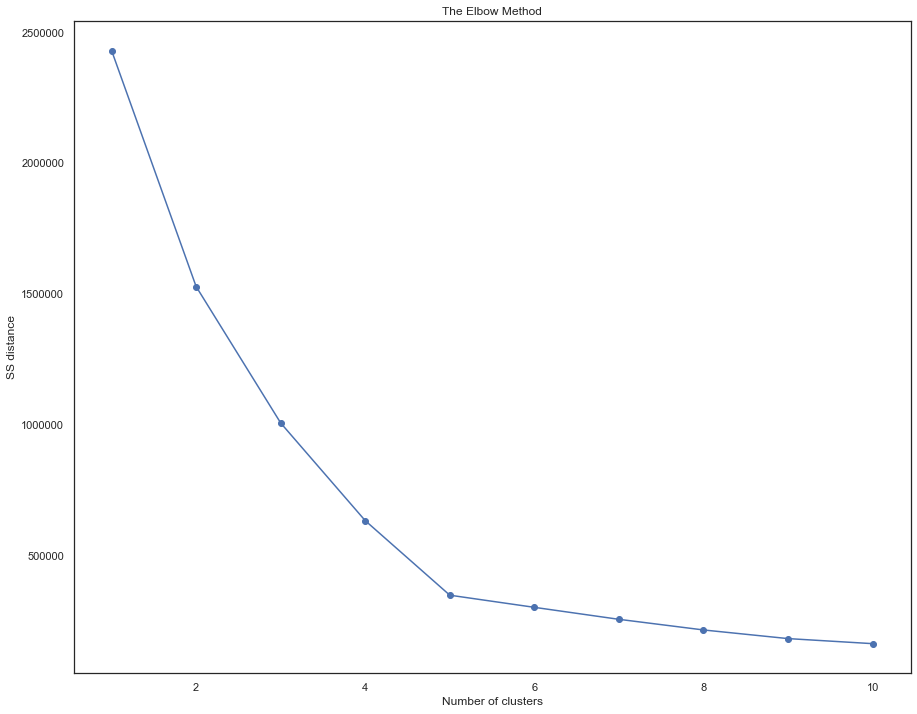

In [58]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11), ss, marker="o")

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

# We see y axis in easy to read form
plt.ticklabel_format(style="plain", axis="y")

plt.show()

SS - sum of squared distancing from each point to its assigned cluster centre. 

Elbow contains the optium number of clusters. Here it seems like 5 is the right number. 

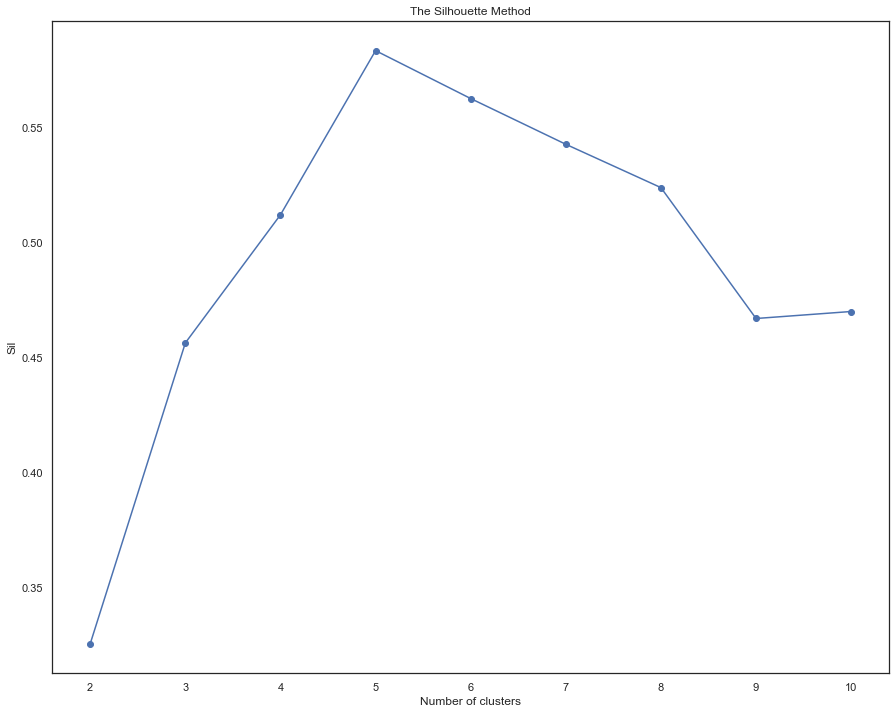

In [59]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax + 1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric="euclidean"))

# Plot the silhouette method.
plt.plot(range(2, kmax + 1), sil, marker="o")

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters. It provides a succinct graphical representation of how well each object has been classified.

Here 5 has the highest rating. This is also our elbow point which is good! 


## 4. Evaluate k-means model at different values of *k*

### Lets start by looking at points on either side of the elbow

Experimenting with different numbers of clusters

### Using 4 clusters 

Text(0.5, 1.1, 'Pair Plot - Fitting K=4')

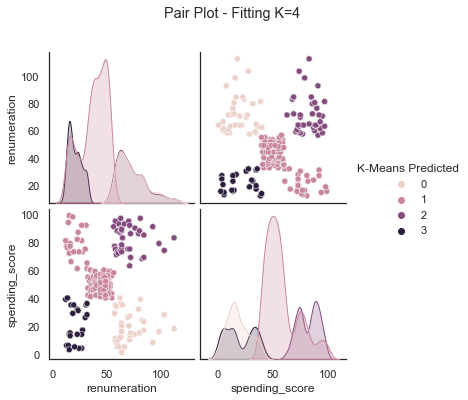

In [60]:
# Use 4 clusters:
kmeans = KMeans(n_clusters=4, max_iter=15000, init="k-means++", random_state=42).fit(x)

clusters = kmeans.labels_
x["K-Means Predicted"] = clusters

# Plot the predicted.
g = sns.pairplot(x, hue="K-Means Predicted", diag_kind="kde")
g.fig.suptitle("Pair Plot - Fitting K=4", y=1.1)

In [61]:
# Check the number of observations per predicted class.
x["K-Means Predicted"].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

It seems like group number one should really be two seperate groups. 

### Using 6 clusters 

Text(0.5, 1.1, 'Pair Plot - Fitting K=6')

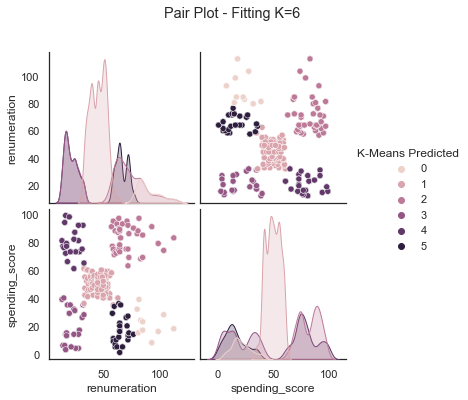

In [62]:
# Use 6 clusters:
kmeans = KMeans(n_clusters=6, max_iter=15000, init="k-means++", random_state=42).fit(x)

clusters = kmeans.labels_
x["K-Means Predicted"] = clusters

# Plot the predicted.
g = sns.pairplot(x, hue="K-Means Predicted", diag_kind="kde")
g.fig.suptitle("Pair Plot - Fitting K=6", y=1.1)

In [63]:
# Check the number of observations per predicted class.
x["K-Means Predicted"].value_counts()

1    767
2    356
3    271
4    269
5    214
0    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

Text(0.5, 1.1, 'Pair Plot - Fitting K=5')

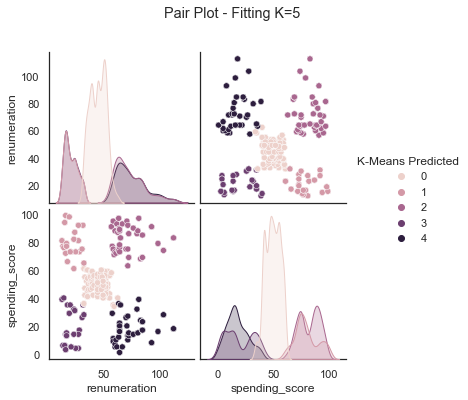

In [64]:
# Apply the final model.
# Use 6 clusters:
kmeans = KMeans(n_clusters=5, max_iter=15000, init="k-means++", random_state=42).fit(x)

clusters = kmeans.labels_
x["K-Means Predicted"] = clusters

# Plot the predicted.
g = sns.pairplot(x, hue="K-Means Predicted", diag_kind="kde")
g.fig.suptitle("Pair Plot - Fitting K=5", y=1.1)

In [65]:
# Check the number of observations per predicted class.
x["K-Means Predicted"].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

This seems to make the most sense. There are 5 different groups which are clearly idenditfied by clustering. One group is not much bigger or smaller than another. 

## 6. Plot and interpret the clusters

,renumeration,spending_score,K-Means Predicted
0,12.30,39,3
1,12.30,81,1
2,13.12,6,3
3,13.12,77,1
4,13.94,40,3


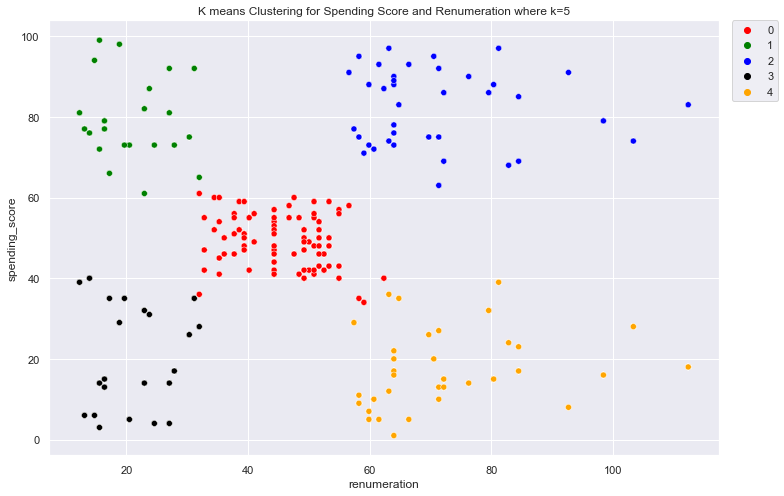

In [66]:
# Visualising the clusters.
# Set plot size.
sns.set(rc={"figure.figsize": (12, 8)})

sns.scatterplot(
    x="renumeration",
    y="spending_score",
    data=x,
    hue="K-Means Predicted",
    palette=["red", "green", "blue", "black", "orange"],
).set(title="K means Clustering for Spending Score and Renumeration where k=5")

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

# View the DataFrame.
x.head()

Here we see 5 different clusters the connect different renumeration and spending scores. Interestingly, individuals who earn less still spend higher amounts, as seen in the green group. Whereas, individuals who earn more spend smaller amounts. I think it is difficult to create new sales strategies or marketing campagns off this data. 

## Using 3D clustering

Now I'm going to use 3D clustering to get more insights by using K means clustering techniques

In [67]:
reviews_cleaned.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [68]:
x = reviews_cleaned.iloc[:, [1, 2, 3]]

x.head()

,age,renumeration,spending_score
0,18,12.30,39
1,23,12.30,81
2,22,13.12,6
3,25,13.12,77
4,33,13.94,40


In [69]:
# creating a two dimentional matrix with chosen columns to
# perform 3D clustering
x = reviews_cleaned.iloc[:, [1, 2, 3]].values
x

array([[18.  , 12.3 , 39.  ],
       [23.  , 12.3 , 81.  ],
       [22.  , 13.12,  6.  ],
       ...,
       [34.  , 92.66, 91.  ],
       [34.  , 98.4 , 16.  ],
       [32.  , 92.66,  8.  ]])

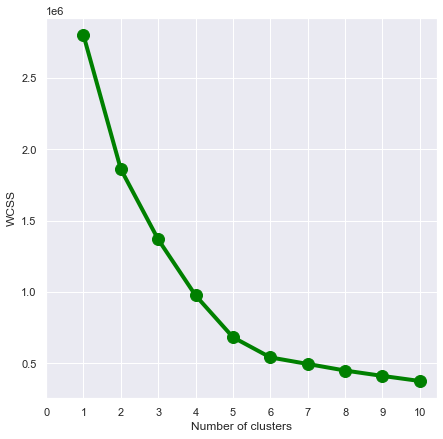

In [70]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init="k-means++")
    model.fit(x)
    WCSS.append(model.inertia_)

fig = plt.figure(figsize=(7, 7))
plt.plot(range(1, 11), WCSS, linewidth=4, markersize=12, marker="o", color="green")
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

WCSS stands for the sum of squared distance between each point and the centroid in a cluster.

In [71]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_clusters = model.fit_predict(x)

Choosing n_clusters as 5 as indicated by the elbow method.

<AxesSubplot:ylabel='count'>

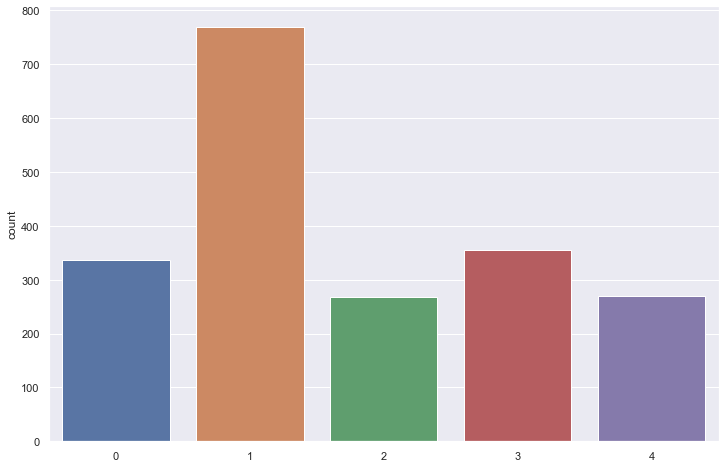

In [72]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

Same colours used here used in the scatter plot below

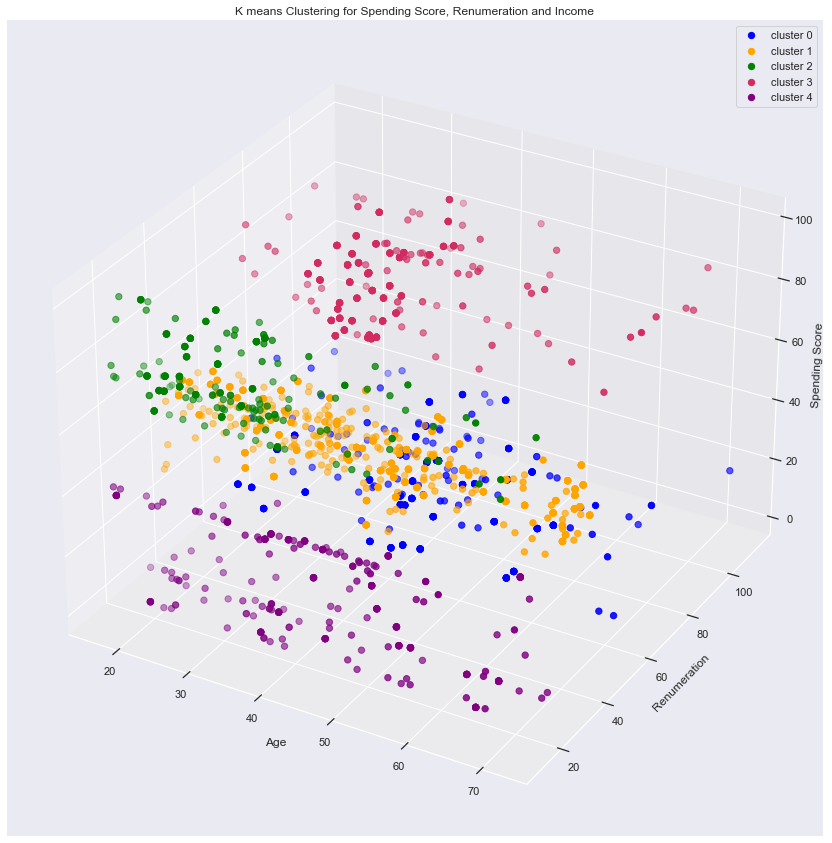

In [73]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    x[y_clusters == 0, 0],
    x[y_clusters == 0, 1],
    x[y_clusters == 0, 2],
    s=40,
    color="blue",
    label="cluster 0",
)
ax.scatter(
    x[y_clusters == 1, 0],
    x[y_clusters == 1, 1],
    x[y_clusters == 1, 2],
    s=40,
    color="orange",
    label="cluster 1",
)
ax.scatter(
    x[y_clusters == 2, 0],
    x[y_clusters == 2, 1],
    x[y_clusters == 2, 2],
    s=40,
    color="green",
    label="cluster 2",
)
ax.scatter(
    x[y_clusters == 3, 0],
    x[y_clusters == 3, 1],
    x[y_clusters == 3, 2],
    s=40,
    color="#D12B60",
    label="cluster 3",
)
ax.scatter(
    x[y_clusters == 4, 0],
    x[y_clusters == 4, 1],
    x[y_clusters == 4, 2],
    s=40,
    color="purple",
    label="cluster 4",
)
ax.set_xlabel("Age")
ax.set(title="K means Clustering for Spending Score, Renumeration and Income")
ax.set_ylabel("Renumeration")
ax.set_zlabel("Spending Score")
ax.legend()
plt.show()

Here we have a 3D graph with different clusters recorded. I will now draw insights from this graph.

Interesting how there is a group of people with a low age, high income and a higher spending score, we can see how their cluster forms in cluster 3 in pink. There is room to target some products to younger individuals with more income. These individuals will likley be more inclined to buy more expensive trendy products such as video games. 

The green group is another group of younger individuals who spend a lot at turtle games. Even though these individuals have a lower income they than the pink group the still spend the same amount. As this group are willing to spend a lot on turtle games it could be worth targetting this group with bundles and deals to encourage and maintain their spending habits. 

The purple group demonstrates that those with a lower income interestestingly spend less. These individuals are across a range of age categories. This could indicate that for less expensive items there is not as much as need to price these at a specific age group. 

The centre of the blue group falls around middle age individuals with a higher remuneration. However, this group also have a lower spending score. It is possible that this group are more interested in products such as boardgames. They are potentially buying these for families or friendship groups. Some boardgames sales strategies could be targetted at families or middle age friendship groups. 

This article provides more evidence about how young individual with middle to high incomes spend more on games: https://priceonomics.com/gender-income-and-education-who-plays-video-games/

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## 1. Load and explore the data

In [74]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk
import os
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings

warnings.filterwarnings("ignore")

In [75]:
# Keep necessary columns. Drop unnecessary columns.
survey = reviews_cleaned.drop(
    columns=[
        "gender",
        "age",
        "spending_score",
        "loyalty_points",
        "education",
        "product",
        "renumeration",
    ]
)

# View DataFrame.
survey.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


Dropping rows that do not have any value for the comment field

In [76]:
survey.shape

(2000, 2)

In [77]:
# Determine if there are any missing values.
survey.dropna(subset=["review"], inplace=True)

# Determine if there are any missing values.
survey.dropna(subset=["summary"], inplace=True)

In [78]:
# View the shape of the DataFrame.
survey.shape

(2000, 2)

We see here no missing values have been dropped

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [79]:
# Review: Change all to lower case and join with a space.
survey["review"] = survey["review"].apply(
    lambda x: " ".join(x.lower() for x in x.split())
)

# Preview the result.
survey["review"].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

Now I am going to adjust words to lower case. 

We are going to create a lamba function x to convert each cell in comments column to lower case. Function includes list comprehension with a split method. List comprehension with split method extracts each word from cell. The I use the apply the lower method. The apply method attached to survey data comments with a lambda function as a parameter processes every item in the specifed column. Then insert the new word back into the data set. The join function places the transformed word back into data frame cell. 

Update the column by assigning code to survey data comments. We will then display preview of updated column using the head method. 

In [80]:
# Review: Change all to lower case and join with a space.
survey["summary"] = survey["summary"].apply(
    lambda x: " ".join(x.lower() for x in x.split())
)

# Preview the result.
survey["summary"].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

Do the same for the summary column to remove upper cases

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [81]:
# Replace all the punctuations in review column.
survey["review"] = survey["review"].str.replace("[^\w\s]", "")


# View output.
survey["review"].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

Replace punction with blank spaces using the str.replace string method applied to survey data comments. 

In method parameters need to specify the w and s for all punctuation marks as the target. Then this will be replacement for the target characters. 

Assign code to review data and we can display preview of updated column using head method. 

In [82]:
# Replace all the puncuations in summary column.
survey["summary"] = survey["summary"].str.replace("[^\w\s]", "")

# View output.
survey["summary"].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

Do the same for the summary coloumn

### 2c) Drop duplicates in both columns

Checking for duplicates

In [83]:
# Drop duplicates in both columns.
survey.review.duplicated().sum()
survey.summary.duplicated().sum()

649

We see that 3% of the answers are duplicates which could scew the analysis 

In [84]:
# Drop duplicates.
survey1 = survey.drop_duplicates(subset=["review"])

# Drop duplicates.
survey2 = survey.drop_duplicates(subset=["summary"])

In [85]:
# Preview data.
survey2.reset_index(inplace=True)
survey2.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


Duplicate values are dropped and index is reset now 

In [86]:
# View the shape of the data.
survey2.shape

(1351, 3)

We see now the duplicates have been dropped

### 2d Visulaise most frequently used words

Searching for the most reoccuring word using word cloud. 

Doing this individually for the summary and the review column. 

In [87]:
# Create seperate data frames with differernt columns
summary_token = survey2.drop(columns=["review"])

# Sense check
summary_token.head()

,index,summary
0,0,the fact that 50 of this space is wasted on ar...
1,1,another worthless dungeon masters screen from ...
2,2,pretty but also pretty useless
3,3,five stars
4,4,money trap


In [88]:
# String all the comments together in a single variable.
# Create an empty string variable.
survey_summary = ""
for i in range(survey2.shape[0]):
    # Add each comment.
    survey_summary = survey_summary + survey2["summary"][i]

I have now gathered all the text into one variable using this process:

- Declare empty string variable called survey_summary. 
- Assign it a value so that we can pass variable into a loop to iterate values. 
- Use a for loop to cycle through all the values in the comments column. 
- We're going to define i as the iterator. 
- Range shape 0 to iterate through the number of rows in the data frame. 
- We can to add the content of each item under the survey 2 to the survey summary string using the plus operator. 
- Then I will specfiy the row number under comments for each iterationl 

In [89]:
# String all the comments together in a single variable.
# Create an empty string variable.
survey_review = ""
for i in range(survey2.shape[0]):
    # Add each comment.
    survey_review = survey_review + survey2["review"][i]

Creating the same iteration for reviews 

In [90]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    colormap="plasma",
    stopwords="none",
    min_font_size=10,
).generate(survey_summary)

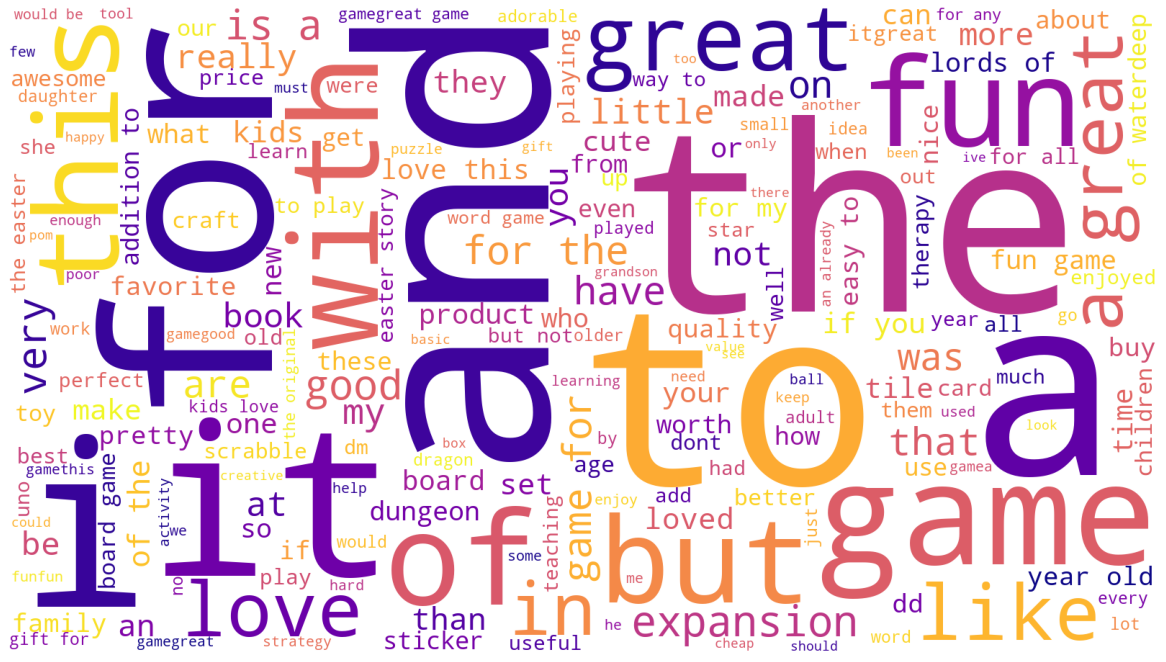

In [91]:
# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Note that your word cloud might differ slightly from the one provided.

Here we have the problem of a lot of stop words

In [92]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    colormap="plasma",
    stopwords="none",
    min_font_size=10,
).generate(survey_review)

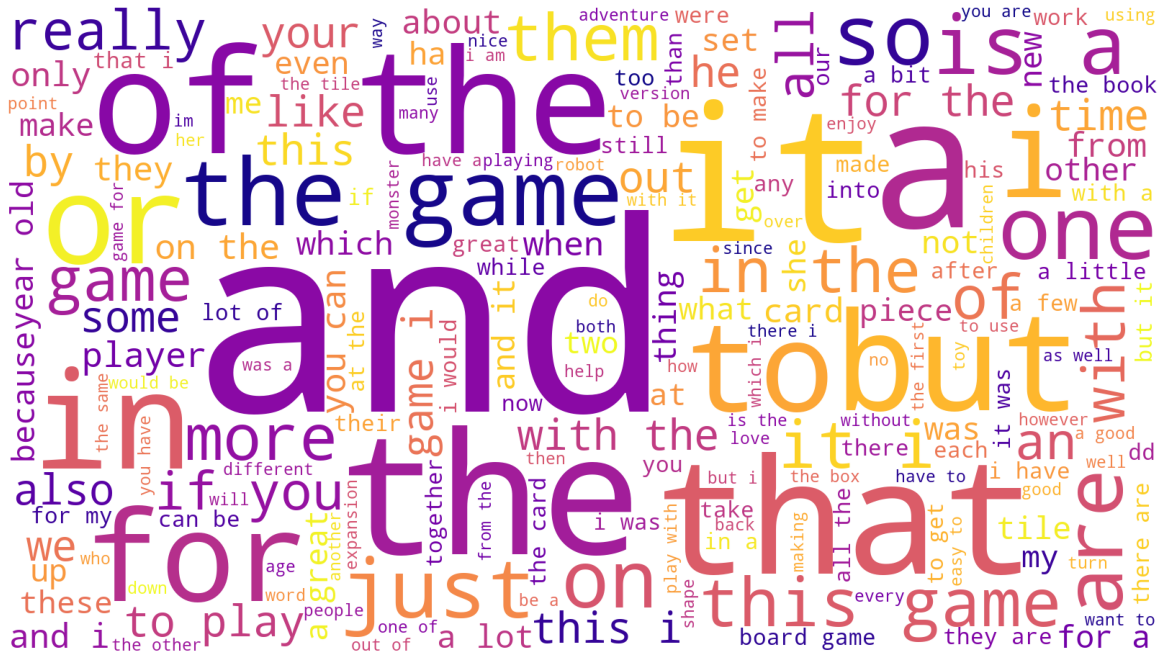

In [93]:
# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Note that your word cloud might differ slightly from the one provided.

There are also a lot of stop words here! 

## 3. Tokenise

I am now going to use the tokenise method to get more accurate word cloud 

In [94]:
# Create two differernt databases
review_token = survey2.drop(columns=["summary"])
summary_token = survey2.drop(columns=["review"])

# Sense check
review_token.head()

,index,review
0,0,when it comes to a dms screen the space on the...
1,1,an open letter to galeforce9 your unpainted mi...
2,2,nice art nice printing why two panels are fill...
3,3,amazing buy bought it as a gift for our new dm...
4,4,as my review of gf9s previous screens these we...


In [95]:
# Sense check
summary_token.head()

,index,summary
0,0,the fact that 50 of this space is wasted on ar...
1,1,another worthless dungeon masters screen from ...
2,2,pretty but also pretty useless
3,3,five stars
4,4,money trap


In [96]:
# Tokenise the words
review_token["tokens"] = review_token["review"].apply(word_tokenize)

# Preview data.
review_token["tokens"].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

Here I am bringing in code to tokenise the words. We will use the apply method on the comments column and specfiy word_tokenise in the methods paramters. Now this function will process all the data in the column. 

We will assign the output to a new column we are going to call tokens.

When I preview token columns we see how the token columns comprised of tokens. 
A sequence of characters and individual words are dervied as a result of splitting the comments in the survey. We see words separated into token list.  

The newly appended column has a list of tokens which are the individuals words of each comments in the survey saved in single rows. 

We now need to combine all tokens as a single list of word to compute tokens with maximum frequency. 

In [97]:
# Tokenise the words
summary_token["tokens"] = summary_token["summary"].apply(word_tokenize)

# Preview data.
summary_token["tokens"].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

Do the same for the summary column

In [98]:
# Define an empty list of tokens.
all_tokens_review = []

for i in range(review_token.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + review_token["tokens"][i]

To combine all tokens as a single list of word to compute tokens with maximum frequency we can first define an empty list named all tokens.

Here we are defining empty list and using a for loop to iterate through all the values in the token column. We are using i as the iterator and range survey as 0 to iterate through number of rows in the data frame.

Next we will add the contents of each item under tokens to the all tokens reviews string using the plus operator. We will use i to specifc row number under tokens for each iteration.

In [99]:
# Define an empty list of tokens.
all_tokens_summary = []

for i in range(summary_token.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + summary_token["tokens"][i]

We do the same for the summary column

### 4b) Remove alphanumeric characters and stopwords

In [100]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_sum = [word for word in all_tokens_review if word.isalnum()]

# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_rev = [word for word in all_tokens_summary if word.isalnum()]

Now I am going to adress the concern for punction characters. 

I use list comprhenistion to remove punctation. I then specfiy what words will be used in the iteration using a conditional if statement for the comprehension. I finally apply the isalnum() method to word to put items into new list

In [101]:
# Remove all the stopwords from summary
nltk.download("stopwords")
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words("english"))

# Create a filtered list of tokens without stop words.
tokens_sum_1 = [x for x in tokens_sum if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_sum_1_string = ""

for value in tokens_sum:
    # Add each filtered token word to the string.
    tokens_sum_1_string = tokens_sum_1_string + value + " "

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ameliaoberholzer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Elimating stop words. We are preparing data by downloading stop words corupus module.

How to remove the stop words:
- Define an English stop word set.
- Create a second list using list comprehension. This iterates through tokens summary list with x as the iterator.
- We will also add a condition if statement that checks if the current x word is not in the english stop words set.
- If the statement is true then we will assign the word as an item in the tokens tokens summary string list.
- Tokens summary string combines all token words and iterate all values through token summary. 
- The iterator then adds the content of values to token summary. 
- Finally add in empty space between words using plus operator.

In [102]:
# Remove all the stopwords from reviews
nltk.download("stopwords")
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words("english"))

# Create a filtered list of tokens without stop words.
tokens_rev_1 = [x for x in tokens_rev if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_rev_1_string = ""

for value in tokens_rev:
    # Add each filtered token word to the string.
    tokens_rev_1_string = tokens_rev_1_string + value + " "

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ameliaoberholzer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Also do this for reviews column

### 4c) Create wordcloud without stopwords

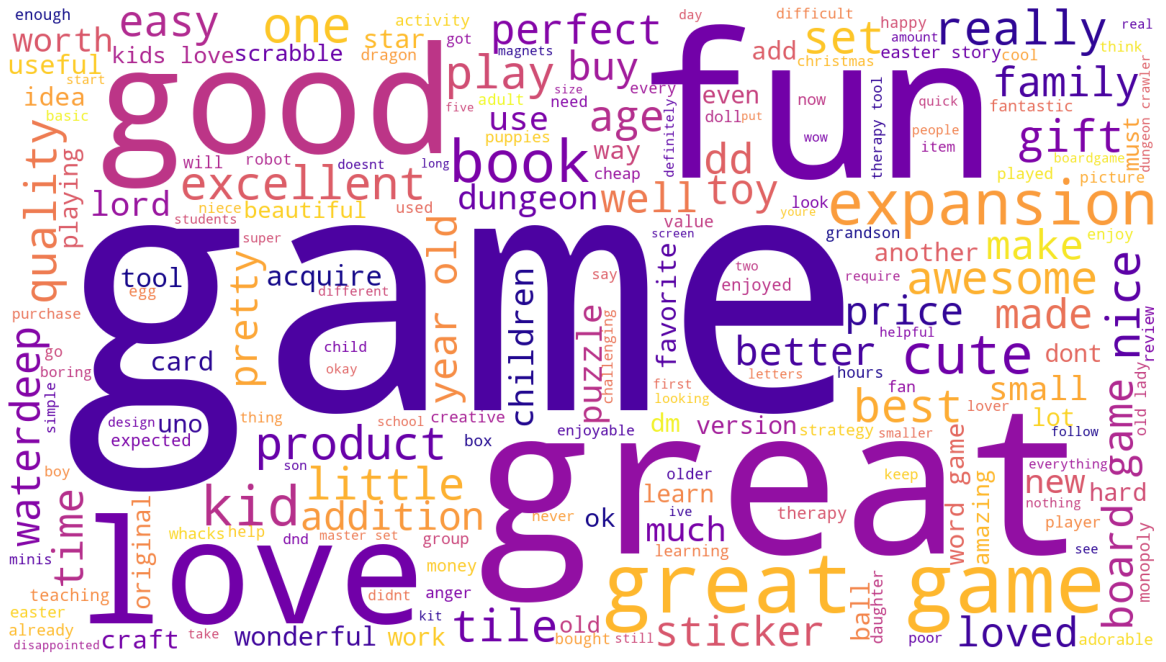

In [103]:
# Create a WordCloud.
wordcloud = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    colormap="plasma",
    min_font_size=10,
).generate(tokens_rev_1_string)

# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Now we see a more clear word cloud for the reviews column. We see in this that feedbak mainly includes more positive words. This is a sign that previous marketing campaigns have been successful. To some extent gamestop should continue what it is already doing!

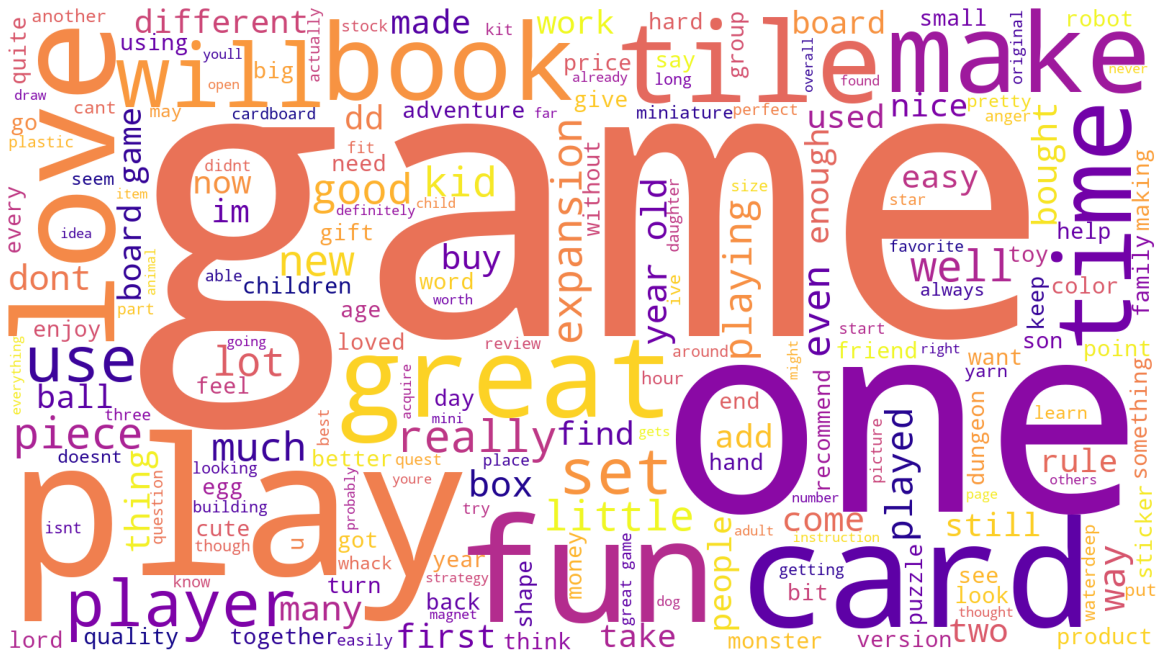

In [104]:
# Create a WordCloud.
wordcloud = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    colormap="plasma",
    min_font_size=10,
).generate(tokens_sum_1_string)

# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Very positive feedback again in the summary column. Of course we don't know what context these words are in so we can't tell the exact sentiment behind the words.

### 4d) Identify 15 most common words and polarity

In [105]:
# Determine the 15 most common words.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist_rev = FreqDist(tokens_rev_1)

# Preview data.
fdist_rev

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

We we can list the most common requency of words in the review column

In [106]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(
    Counter(tokens_rev_1).most_common(15), columns=["Word", "Frequency"]
).set_index("Word")

# Preview data.
counts

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


[None]

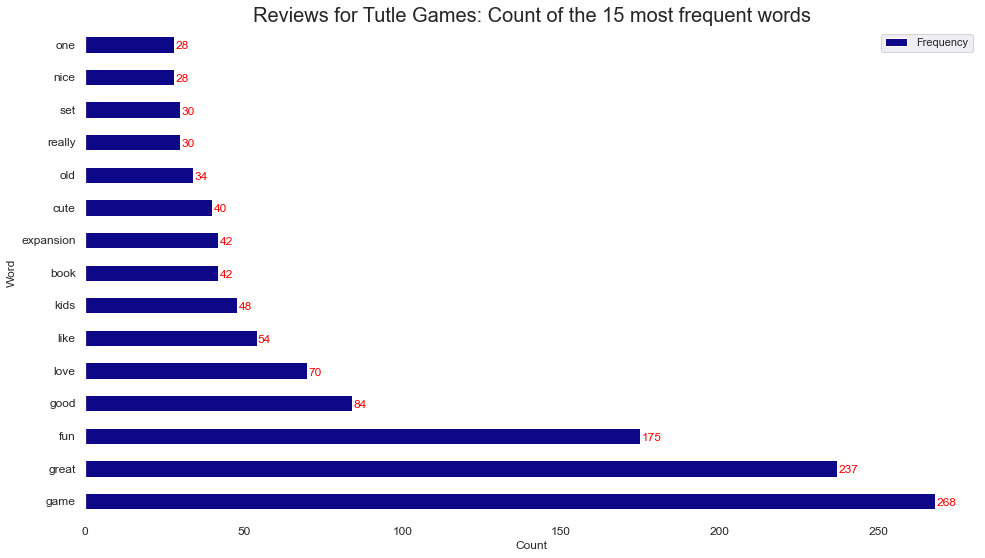

In [107]:
# Set the plot type.
ax = counts.plot(kind="barh", figsize=(16, 9), fontsize=12, colormap="plasma")

# Set the labels.
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title(
    "Reviews for Tutle Games: Count of the 15 most frequent words", fontsize=20
)


# Draw the bar labels.
for i in ax.patches:
    ax.text(
        i.get_width() + 0.41,
        i.get_y() + 0.1,
        str(round((i.get_width()), 2)),
        fontsize=12,
        color="red",
    )

# Specify background color for the axis/plot
ax.set(facecolor="white")

We can visualise this information like so. Here will create the bar chart using a for loop. This is possible by:
- Using I as the iterator 
- Using ax.patches as the data to iterate through each row in the data. 
- I will represent each bar in the chart.
- Then apply text function to ax.
- Get_y to get the bar sizes.

Words such as 'great', 'fun' and 'good' have the highest counts which is a great sign that many customers have positive things to say about turtle games!



In [108]:
# Calculate the frequency distribution.
fdist_sum = FreqDist(tokens_sum_1)

# Preview data.
fdist_sum

FreqDist({'game': 1360, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [109]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(
    Counter(tokens_sum_1).most_common(15), columns=["Word", "Frequency"]
).set_index("Word")

# Preview data.
counts

,Frequency
Word,
game,1360
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


[None]

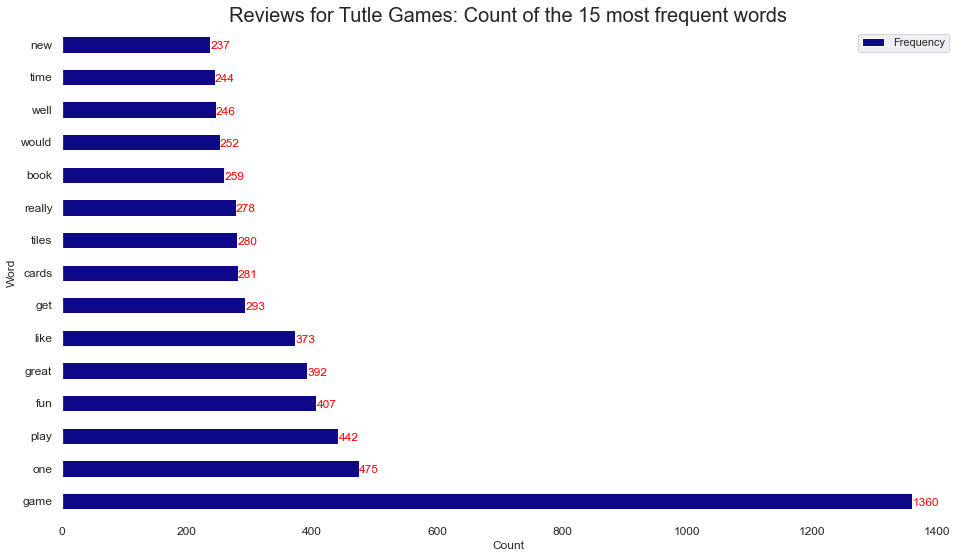

In [110]:
# Set the plot type.
ax = counts.plot(kind="barh", figsize=(16, 9), fontsize=12, colormap="plasma")

# Set the labels.
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title(
    "Reviews for Tutle Games: Count of the 15 most frequent words", fontsize=20
)

# Draw the bar labels.
for i in ax.patches:
    ax.text(
        i.get_width() + 0.41,
        i.get_y() + 0.1,
        str(round((i.get_width()), 2)),
        fontsize=12,
        color="red",
    )

# Specify background color for the axis/plot
ax.set(facecolor="white")

We do the same for the summary column. In both cases the words are predominantly positive or netural.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [111]:
# Provided function.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]


def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]


# Populate a new column with polarity scores for each comment.
survey["polarity"] = survey2["review"].apply(generate_polarity)
survey["subjectivity"] = survey2["review"].apply(generate_subjectivity)

# Preview the result.
survey["polarity"].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

We can see a rating of the overall sentiment. Sentiment polairty scores tries find the overall sentiment of the data. It also incorporates room of nuances in lanuage by giving a rating of how accurate the polarity score is.

A score of -1 is the most negative sentiment. Whereas a score of 1 is the most positive sentiment. 

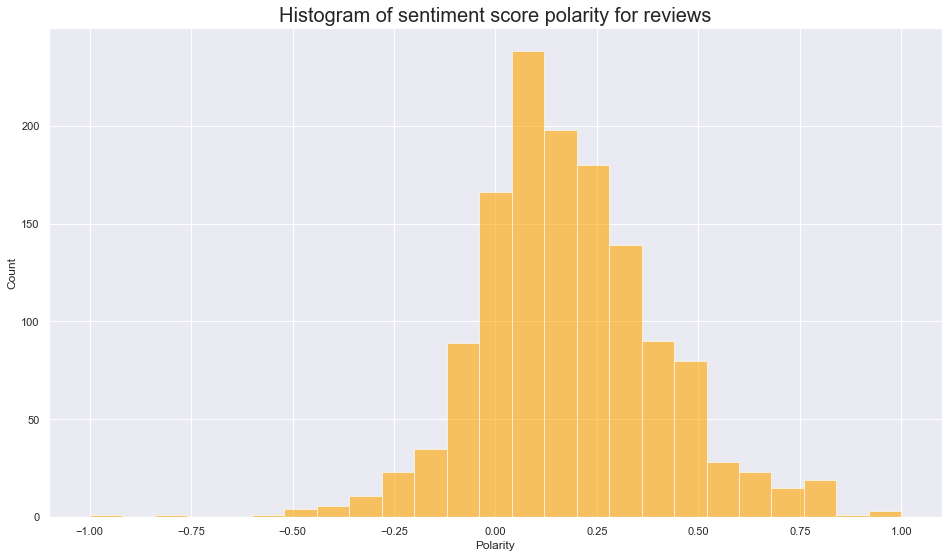

In [112]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16, 9))

# Define the bars.
n, bins, patches = plt.hist(survey["polarity"], num_bins, facecolor="orange", alpha=0.6)

# Set the labels.
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of sentiment score polarity for reviews", fontsize=20)

plt.show()

For the reviews column the sentiment score is higher and more shifted towards the right.

In [113]:
# Provided function.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]


def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]


# Populate a new column with polarity scores for each comment.
survey["polarity"] = survey2["summary"].apply(generate_polarity)
survey["subjectivity"] = survey2["summary"].apply(generate_subjectivity)

# Preview the result.
survey["polarity"].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

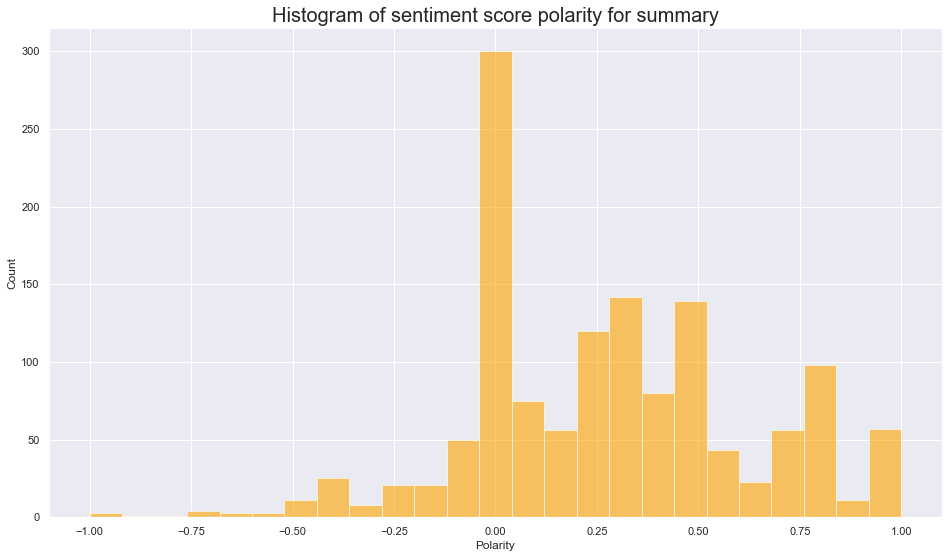

In [114]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16, 9))

# Define the bars.
n, bins, patches = plt.hist(survey["polarity"], num_bins, facecolor="orange", alpha=0.6)

# Set the labels.
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of sentiment score polarity for summary", fontsize=20)

plt.show()

For the summary column the polarity result shows that the sentiment is mainly positive. It reveals that there is a large amount of neutral sentiment and then a distribution of mostly positive sentiment. 

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [115]:
# Create a DataFrame.
negative_sentiment = survey.nsmallest(20, "polarity")

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[["review", "polarity", "subjectivity"]]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=["review"], **{"width": "1200px"})

,review,polarity,subjectivity
17,when i unexpectedly came across a picture of buckley on the first page of the book and after hearing the other reviews of how difficult and advanced the techniques in the book were i couldnt believe my eyes i was surprised to see the face of a handsome teenager of which my previous impression was completely the opposite to the one i held in my hands and this guy was a professional card magician at the age of 18 and able to do tricks infront of hundreds of people onstage in 1908 i have a feeling that this guys mystery and skill probably gained him significant success with girls his age the mysterious effects of these difficult to execute sleights are priceless and dazzling beyond belief if a 3 columns card trick can make girls believe in magic then buckleys stuff probably knocked their socks off literally believe me this guy would be able to blow david blaine out of the water and make him look like bob longe that being said and out of the way the book itself is amazing there are very clearcut photos of buckleys hands and very impressive card tricks or as he calls them in the fourth section card experiments best of all this book isnt like most others where the authors seem to purposely be vague sw erdnase and not give the best descriptions mr buckley gives you every detail and is your friend throughout the book showing you exactly how everything is done without any confusion and there is so much different good stuff in here that youll probably never need another book for advanced materials it is a great book and a great reference to help you on your way to card excellence and showmanship you will not be disappointed with this purchase,-1.000000,1.000000
165,awesome book,-1.000000,1.000000
588,my children have enjoyed the star from afar so much at christmas that we were wildly anticipating the arrival of our easter story egg and of course it did not disappoint the moment it arrived my kids were thrilled to open the box and look at each eggs beautiful artwork as my children were admiring and playing with the eggs i began reading the book to them they loved each storyand loved that each egg matched up to a story in the book the easter story egg is beautifully written it is a series of 7 short short stories in one hardbound book the stories are written in beautiful rhyme and verse and do a great job explaining the events leading up to easter my kids really enjoyed the visual of the last egg which is the stone that is rolled awayand when its opened it is empty what a great visual for my young children to understand the meaning of easter i am very much looking forward to using this product as easter approachesand i know that it will be a new tradition in our home we have given so many new families the star from afar for baptisms birthdays and christmas and i will be adding this my favorite gifts to give to young ones too another amazing product by natalie ard hoping there is more to come,-1.000000,1.000000
838,hall of fame board game the game is easy to learn and fantastic for 3 4 or 5 players games go very quickly this edition is a little cheap but then that is the case for all games if you like board games like cataan axis and allies risk monopoly or scrabble youll probably really like this,-0.900000,0.700000
1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in

Interesting here to see the most negative senitment for the summary column. 

There are definitely some misinterpretations here. For example in row 17 someone desbribes how the magician from this magic book is much better than previous magiancs. I expected that the reivew talking about about how other magicans are worse than the magician featured in this book is what flagged the comment up as negative. This is an example of the limitations of sentiment analysis. 

In [116]:
# Create a DataFrame.
negative_sentiment = survey.nsmallest(20, "polarity")

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[["summary", "polarity", "subjectivity"]]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=["summary"], **{"width": "1200px"})

,summary,polarity,subjectivity
17,buckley was a card mommer,-1.000000,1.000000
165,five stars,-1.000000,1.000000
588,my children have enjoyed the star from afar so much at christmas,-1.000000,1.000000
838,hall of fame game,-0.900000,0.700000
1,another worthless dungeon masters screen from galeforce9,-0.800000,0.900000
116,robot time,-0.750000,0.750000
266,challenging for an 11yearold but made adorable puppies,-0.700000,0.200000
635,i really wanted to love this i like it ok,-0.700000,0.666667
638,so gorgeous and love the rhyming in the book,-0.700000,0.666667
144,disappointed,-0.650000,1.000000


Similar words have been misinterrupted here. The shorter the sentence the less information the sentiment analysis has to guage whether something is positive or negative. 

In [117]:
# Create a DataFrame.
positive_sentiment = survey.nlargest(20, "polarity")

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[["review", "polarity", "subjectivity"]]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=["review"], **{"width": "1200px"})

,review,polarity,subjectivity
5,grandson loves,1.000000,0.300000
23,there are only few tatoos so in one week they are gone it could be better if there were more so they can share with brothers or friends the alternative is to buy like 4 or 5 of these so the kid doesnt get upset when they are gone to quick also with one bath they are gone so they dont last enough like other tatoos 2 to 5 days,1.000000,1.000000
27,beautiful art work,1.000000,1.000000
61,we had a robot themed first birthday party for our son and had a really tough time finding little robot items for the guest thankyou bags stumbled upon this and took a chance they were perfect the book is small maybe 4x6 and includes stickers of robot arms legs heads etc that the children can use to build a robot they were a hit,1.000000,1.000000
107,this create your own robot sticker book is exactly what i was hoping it would be i would definitely recommend this to any sticker collector such as myself or to any parentgrandparentauntuncle buying this is a gift for a kid seven thumbs up,1.000000,1.000000
112,i added this to a birthday present for my 3year old nephew he loved it but i was surprised at how small this was in the back there is a picture of a robot and you dress him using the stickers,1.000000,1.000000
132,my son enjoyed picking the parts to assemble his own sticker robot fun for home or trips in the car,1.000000,1.000000
133,sticker activity book my arse this book is 2 pages of stickers folded in half and stapled inside a cover jacket its not a book and there are no activities to speak of except for peeling off the stickers robot parts and affixing them to the back page oh and did i mention this is tiny the whole book is about the size of a passport but with less pages and there is about 4 robots total on the little pages parts are parts but i counted 1 head 2 arms 2 legs 2 feet and a body on each of the 4 pages so that works out to 100 per assembled robot total ripoff,1.000000,1.000000
150,the packaging for a drawyourown dc universe makes it look easy enough but think twice before purchasing it for your own beginning artist it is entirely possible that heshe will be ultimately disappointed or at least frustrated that their art wont resemble the professional examples provided considering the minimal directions given four doublesided color pencils for a total of eight different colors a black marker for bolding speech balloon stencils and an eraser are provided the problem here is that it really becomes more practice in tracing than actually learning how to draw each exercise is four steps 1 a stick figure 2 the pipes 3 details and 4 detailed details there arent any transitional instructions on how to actually get from step 1 to the final image it is just a visual demonstration this book is best for those amateurs with some basic art class experience in terms of knowing how to draw details once theyve have made the circles and connecting lines rating 35 stars no recommended age as any persons artistic talent will vary no matter the age instead a beginning drawing class is best before tackling this book,1.000000,1.000000
166,love this delivered on time,1.000000,1.000000


Again the sentiment analysis has not been accurate here. 

One comment with a score of 337 stated that "only buy this for an adult who is super patient and likes to be covered in fuzz it was a frustrating project to do with an 8 year old there will be crying when the glue doesnt hold and the puppies head falls off it makes a terrible mess and there is not even that much yarn included i would never be able to make the puppies look anywhere close to the ones in the book"

This is clearly a more negative comment

In [118]:
# Create a DataFrame.
positive_sentiment = survey.nlargest(20, "polarity")

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[["summary", "polarity"]]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=["summary"], **{"width": "1200px"})

,summary,polarity
5,five stars,1.000000
23,good product but,1.000000
27,five stars,1.000000
61,great party thank you bag addition,1.000000
107,love it,1.000000
112,nice but very small,1.000000
132,cute for robot loving little ones,1.000000
133,smaller than life,1.000000
150,great idea but needs more instructions details for beginning artists,1.000000
166,five stars,1.000000


We see here how words such as good may be labeled as positive but when the word good is in the context of "not really good" we can question whether sentiment analysis understands the context surrounded certain positive or negative words which change the meaning of a sentence. 

### Trying to get more accurate results
We can try and use a pre-trained neural network instead. I have decided to use VADER as it is provided in the nltk library already and was trained using social media data which is similar to our review data.

In [119]:
from nltk.sentiment import (
    SentimentIntensityAnalyzer,
)  # use nltks pre trained model 'VADER'

sia = SentimentIntensityAnalyzer()


def generate_vader_score(review):
    return sia.polarity_scores(review)["compound"]


survey["vader_compound_score_rev"] = survey["review"].apply(generate_vader_score)

print(survey.iloc[337]["review"])
print(survey.iloc[337]["vader_compound_score_rev"])

only buy this for an adult who is super patient and likes to be covered in fuzz it was a frustrating project to do with an 8 year old there will be crying when the glue doesnt hold and the puppies head falls off it makes a terrible mess and there is not even that much yarn included i would never be able to make the puppies look anywhere close to the ones in the book ours turned out crazy looking book went straight to goodwill
-0.6597


This is just  was one example of how we can use a different models to get more accurate results. One comment that was previously mis-categorised as positive is correctly given a negative compound score here. Making it interesting to consider that this model may give us better results.

VADER is a pre-trained NLP model that is provided with NLTK. It was trained using social media messages so it may be more suitable for these types of reviews. 

The vadar compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).

N.B.: we could potentially look at training our own supervised network using existing review data where unsubjective sentiment is available (i.e. star ratings, thumbs up/down, etc). This would be very costly however.

See reference here that talks how the Vadar model trains data:
https://towardsdatascience.com/social-media-sentiment-analysis-in-python-with-vader-no-training-required-4bc6a21e87b8



In [120]:
survey["vader_compound_score_rev"].head()

0   -0.6333
1    0.9404
2   -0.0045
3    0.8860
4   -0.6808
Name: vader_compound_score_rev, dtype: float64

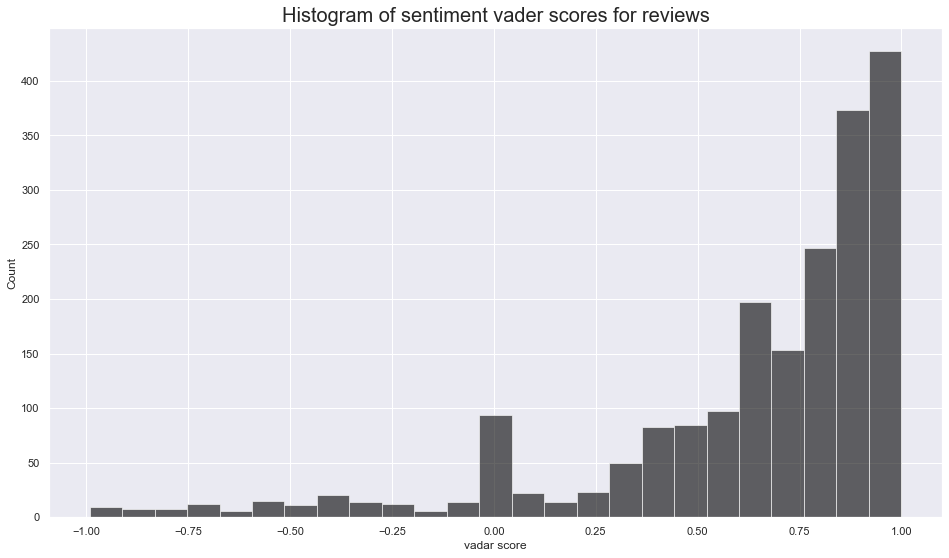

In [121]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16, 9))

# Define the bars.
n, bins, patches = plt.hist(
    survey["vader_compound_score_rev"], num_bins, facecolor="black", alpha=0.6
)

# Set the labels.
plt.xlabel("vadar score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of sentiment vader scores for reviews", fontsize=20)

plt.show()

Here we see a slighlty differernt distribution to model using polarity scores. More comments are labbeled as very positive. This alligns with the word cloud which showed how the most common words within the review column were positive. 

In [122]:
sia = SentimentIntensityAnalyzer()


def generate_vader_score(summary):
    return sia.polarity_scores(summary)["compound"]


survey["vader_compound_score_sum"] = survey["summary"].apply(generate_vader_score)

survey["vader_compound_score_sum"].head()

0   -0.0711
1   -0.4404
2    0.4019
3    0.0000
4   -0.3182
Name: vader_compound_score_sum, dtype: float64

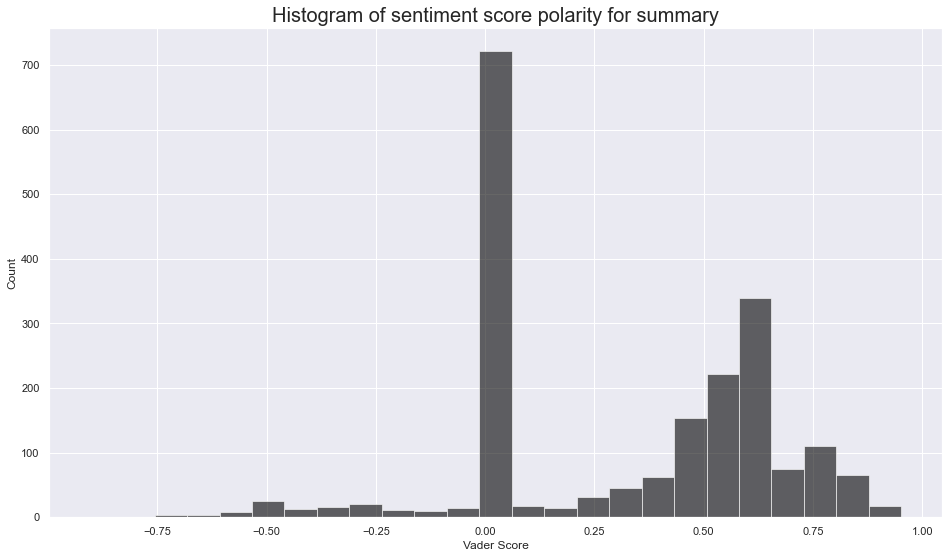

In [123]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16, 9))

# Define the bars.
n, bins, patches = plt.hist(
    survey["vader_compound_score_sum"], num_bins, facecolor="black", alpha=0.6
)

# Set the labels.
plt.xlabel("Vader Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of sentiment score polarity for summary", fontsize=20)

plt.show()

There result is silimar to the distribution of polairty scores in the summary column. Interestingly there are a large number of neutral comments. This makes sense as the summary column has a shorter amount of text and less information to make a decision from. 

In [124]:
# Create a DataFrame.
positive_sentiment = survey.nlargest(20, "vader_compound_score_sum")

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[["review", "vader_compound_score_sum"]]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=["review"], **{"width": "1200px"})

We see the most positive comments identifed by the vadar score in the reviews column. There is a better representation of positive reviews here.

In [125]:
# Create a DataFrame.
negative_sentiment = survey.nsmallest(20, "vader_compound_score_rev")

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[["review", "vader_compound_score_rev"]]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=["review"], **{"width": "1200px"})

We see the most negative comments identifed by the vadar score in the reviews column. There is a better representation of negative reviews here. Very long comments have made the vadar score more innacurate.




In [126]:
# Create a DataFrame.
positive_sentiment = survey.nlargest(20, "vader_compound_score_sum")

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[["summary", "vader_compound_score_sum"]]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=["summary"], **{"width": "1200px"})

,summary,vader_compound_score_sum
1201,wow what a great set of tiles for such a great price a great starter set,0.952400
1121,wrath of ashardalon great investment for an avid rpg fan who enjoys tabletop as well as crpgs,0.918600
1699,great for playing great for creative workshops too,0.916900
1955,easy to learn great fun to play,0.913600
1543,loves stickers and she loves peppa so this was perfect,0.907400
703,great quality very cute and perfect for my toddler,0.907300
491,but the kids really like it and helps start good discussion,0.898800
1029,great game great value,0.891000
1189,great game value for the price is great also,0.891000
973,i wish all those who buy better luck fairly easy to understand and plenty of,0.888500


We see the most positive comments identifed by the vadar score in the summary column. This looks very accurate.

In [127]:
# Create a DataFrame.
negative_sentiment = survey.nsmallest(20, "vader_compound_score_sum")

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[["summary", "vader_compound_score_sum"]]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=["summary"], **{"width": "1200px"})

,summary,vader_compound_score_sum
882,a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,-0.905200
947,no 20 sided die,-0.726900
1565,the tardis the doctor river song amy rory fight every enemy in cards,-0.726900
328,defective poor qc,-0.718400
1003,then you will find this board game to be dumb and boring,-0.680800
1166,before this i hated running any rpg campaign dealing with towns because it,-0.636900
426,but it gets repetitive and the students start to get bored after about half a round,-0.631000
847,worst quality adult board game ive even seen,-0.624900
364,anger control game,-0.571900
530,anger control game,-0.571900


We see the most negative comments identifed by the vadar score in the summary column. This looks mainly accurate. However the word anger is not necessarily negative in this context. 

## Marketing Advice 

Seeing whether the marketing could be aimed at gift advertisement.

In [128]:
reviews_cleaned.shape

(2000, 9)

In [129]:
# Create a user-defined function to search for your chosen work
def contains_gift(survey):
    """does the product contain gift?"""
    survey_lower = survey.lower()
    return "gift" in survey_lower or "present" in survey_lower or "gave" in survey_lower

Using a for loop here to search through the data frame for a certain word. The or operator allows me to search for multiple words.

In [130]:
# Use the apply() function to seatch through the rows
survey_gift = reviews_cleaned["review"].apply(contains_gift)

In [131]:
# Filter the DataFrame
survey[survey_gift]

,review,summary,polarity,subjectivity,vader_compound_score_rev,vader_compound_score_sum
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,0.15,0.500,-0.6333,-0.0711
3,amazing buy bought it as a gift for our new dm...,five stars,0.00,0.000,0.8860,0.0000
24,id buy again as a gift for a young kid obsesse...,temporary tattoos were good gift,0.45,0.875,0.8176,0.7003
31,my 11 yo loved thisand so do i you know i real...,great pictures,0.80,0.750,0.9823,0.6249
32,awesome my 8 year olds favorite xmas gift its ...,perfect,0.80,0.750,0.8750,0.5719
...,...,...,...,...,...,...
1954,love this game bought 3 extras as gifts,five stars,NaN,NaN,0.6369,0.0000
1975,this is so much fun ive ordered 2 sets as gift...,great fun spelling game,NaN,NaN,0.9240,0.8126
1979,somuchfun seriously addictive its a small card...,one of the best games ever,NaN,NaN,0.9231,0.6369
1986,love playing quiddler and this dictionary help...,great dictionary,NaN,NaN,0.8100,0.6249


In [132]:
(168 / 2000) * 100

8.4

We see here that 8.4% of reviews in the data frame mention that their purchase involved a gift or present. This shows how many customers use turtle games as a place to purchase presents. 

Marketing could focus on having an element of the importance of giving loved ones a gift they'll love in adverts. They should also make sure there is a marketing push around Christmas time. 

See this article about how baords contribution to well being and feeling included. This are factors that make great presents and explain why turtle games should focus on marketing games around gift giving. 

https://www.mcmasteroptimalaging.org/blog/detail/blog/2020/12/16/board-games-for-your-health-and-well-being

## Hard or difficult?

In [133]:
# Create a user-defined function to search for your chosen work
def contains_difficulty(survey):
    survey_lower = survey.lower()
    return (
        "complicated" in survey_lower
        or "challenging" in survey_lower
        or "advanced" in survey_lower
        or "hard" in survey_lower
        or "difficult" in survey_lower
    )

Using a loop again to search for certain words. 

In [134]:
# Use the apply() function to seatch through the rows
survey_difficulty = reviews_cleaned["review"].apply(contains_difficulty)

In [135]:
# Filter the DataFrame
difficulty_survey = survey[survey_difficulty]
difficulty_survey

,review,summary,polarity,subjectivity,vader_compound_score_rev,vader_compound_score_sum
16,pretty good book with a variety of unique card...,good book,0.00000,0.00,0.9719,0.4404
17,when i unexpectedly came across a picture of b...,buckley was a card mommer,-1.00000,1.00,0.9953,0.0000
19,ive yet to see a bad review for this book and ...,you better know what youre getting into,0.70000,0.60,0.9501,0.4404
81,this was a stocking stuffer for my son it was ...,it was cute and he enjoyed using it a couple o...,0.05625,0.35,0.4497,0.7430
152,this book takes you from fairly simple to much...,very good book,0.30000,0.20,0.6115,0.4927
...,...,...,...,...,...,...
1859,an enjoyable challenging word card game,five stars,NaN,NaN,0.5423,0.0000
1895,if you enjoy word games im guessing that youll...,tremendous word game,NaN,NaN,0.9960,0.0000
1898,better to have a dictionary words grouped by l...,two stars,NaN,NaN,0.4404,0.0000
1927,great game for new spellers or struggling ones...,great game for new spellers or struggling ones...,NaN,NaN,0.9744,0.3182


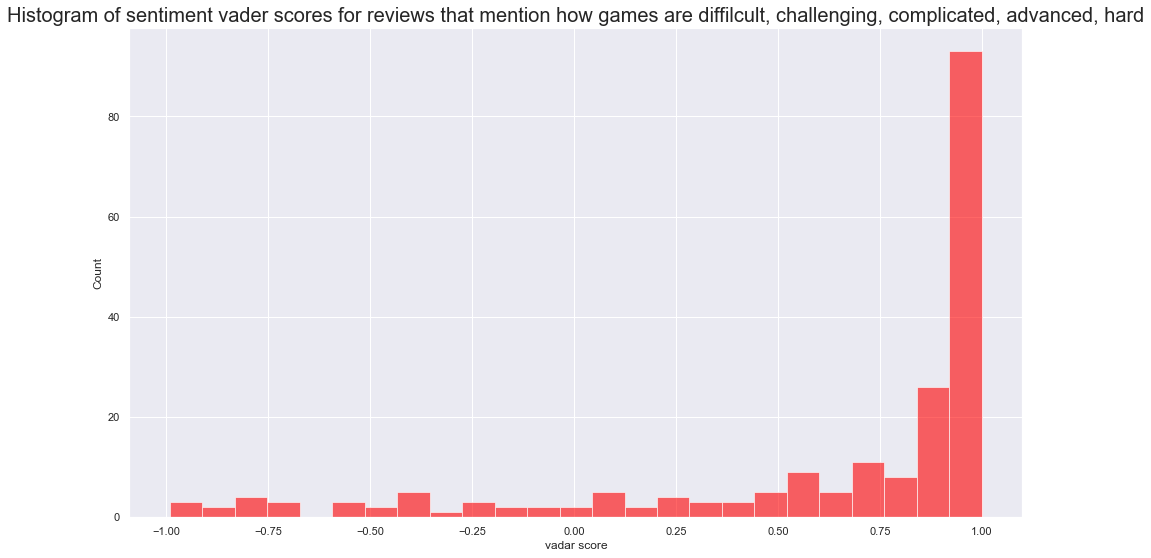

In [136]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16, 9))

# Define the bars.
n, bins, patches = plt.hist(
    difficulty_survey["vader_compound_score_rev"], num_bins, facecolor="red", alpha=0.6
)

# Set the labels.
plt.xlabel("vadar score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title(
    "Histogram of sentiment vader scores for reviews that mention how games are diffilcult, challenging, complicated, advanced, hard",
    fontsize=20,
)

plt.show()

Games that are hard and challenging have high compound vadar score, this demonstrates how customers enjoy games that are challenging. Marketing campaigns can focus on capturing customers who enjoy a challenge and want to push themselves. 

## Easy, simple

In [137]:
# Create a user-defined function to search for your chosen work
def contains_simple(survey):
    survey_lower = survey.lower()
    return (
        "easy" in survey_lower
        or "simple" in survey_lower
        or "straightforward" in survey_lower
        or "unchallenging" in survey_lower
    )

In [138]:
# Use the apply() function to seatch through the rows
survey_simple = reviews_cleaned["review"].apply(contains_simple)

In [139]:
# Filter the DataFrame
survey_simple = survey[survey_simple]
survey_simple

,review,summary,polarity,subjectivity,vader_compound_score_rev,vader_compound_score_sum
8,could be better but its still great i love the...,great but could be even better,0.500,0.600,0.9702,0.7506
25,my young son was thrilled to have tattoos just...,huge hit,0.600,1.000,0.9081,0.3182
31,my 11 yo loved thisand so do i you know i real...,great pictures,0.800,0.750,0.9823,0.6249
58,this is indeed a small book this particular ro...,only ok at best,0.000,0.000,0.4947,0.7506
134,this occupied my almost3 year old for nearly a...,perfect for preschooler,0.525,0.625,0.2732,0.5719
...,...,...,...,...,...,...
1969,my wife and i love this game which lasts about...,a fun game for two or more players,NaN,NaN,0.9216,0.5106
1974,this is a fun word game that is easy to learn ...,a fun word game with cards,NaN,NaN,0.6124,0.5106
1977,fun game you can make it quick and easy for yo...,fun game,NaN,NaN,0.7351,0.5106
1980,nice easy game fun for all,four stars,NaN,NaN,0.8402,0.0000


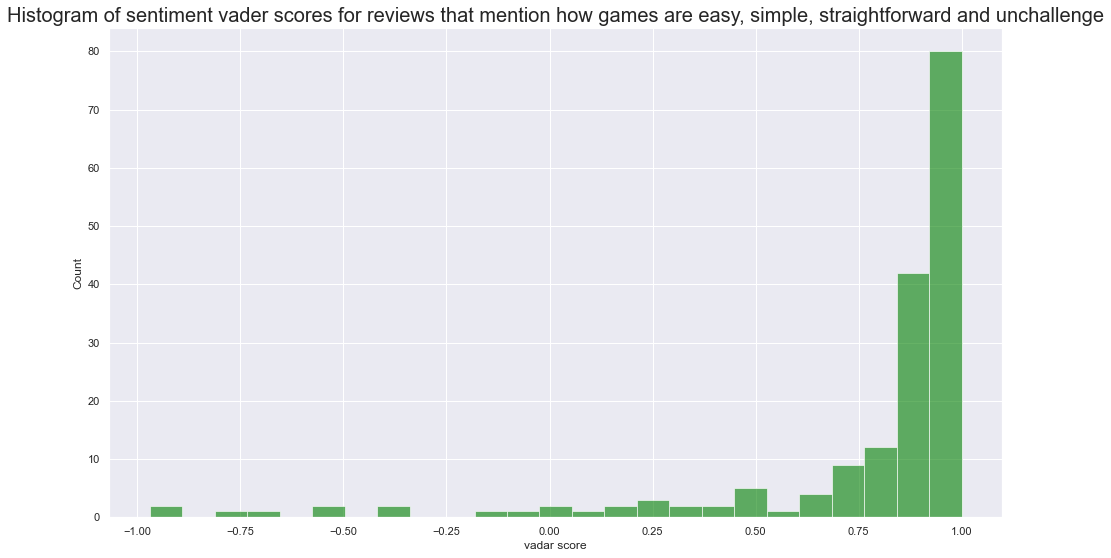

In [140]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16, 9))

# Define the bars.
n, bins, patches = plt.hist(
    survey_simple["vader_compound_score_rev"], num_bins, facecolor="green", alpha=0.6
)

# Set the labels.
plt.xlabel("vadar score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title(
    "Histogram of sentiment vader scores for reviews that mention how games are easy, simple, straightforward and unchallenge",
    fontsize=20,
)

plt.show()

Similarly, reviews that mention how games are simple, straightforward and unchallenging also have good reviews. This demonstrates that customers enjoy easy games and more challenging games. Effective marketing campaigns can target customers who prefer easy or more challenging games to increase customer satisfaction.

# 